In [2]:
import pandas as pd #importamos pandas con alias para manejar dataframes
import glob as glob #importamos glob para obtener rutas de archivos

In [12]:
f = '../data/03_11_22 [Anemometer 1]-0.txt' #definimos archivo de lectura los componentes de la velocidad de un anemometro en tres dimensiones
nombres = ['u','v','w','fecha'] #definimos los nombres de las columnas
tmp = pd.read_csv(f,skiprows=5,usecols=[1,2,3,7],names=nombres) #saltamos lineas del archivo que no son necesarias (5 lineas - propiedades del archivo) y cargamos las columnas con los datos de (u,v,w) y fecha 
tmp.fecha = tmp.fecha.str.replace('p. m.','PM', regex=False)# reemplazamos etiquetas de hora p. m. a PM
tmp.fecha = tmp.fecha.str.replace('a. m.','AM', regex=False)# reemplazamos etiquetas de hora a. m. a AM
tmp.fecha = pd.to_datetime(tmp.fecha, format='%d/%m/%Y %I:%M:%S %p')# establecemos la fecha con el formato d/m/y hora/m/s
tmp.set_index('fecha',inplace=True)# Definimos como índice la fecha

tmp# Obervamos los datos del dataframe

,u,v,w
fecha,,,
2022-03-12 15:00:23,-0.38,-0.28,0.16
2022-03-12 15:00:24,-0.41,-0.30,0.10
2022-03-12 15:00:25,-0.43,-0.26,0.13
2022-03-12 15:00:26,-0.39,-0.15,0.14
2022-03-12 15:00:27,-0.32,-0.01,0.14
...,...,...,...
2022-03-12 15:41:34,-0.51,-1.50,0.21
2022-03-12 15:41:35,-0.41,-1.59,0.19
2022-03-12 15:41:36,-0.35,-1.71,0.24


In [13]:
def importa(f): #Convertimos a función para que se reciban n archivos
    nombres = ['u','v','w','fecha']
    tmp = pd.read_csv(f,skiprows=5,usecols=[1,2,3,7],names=nombres)
    tmp.fecha = tmp.fecha.str.replace('p. m.','PM',regex=True)
    tmp.fecha = tmp.fecha.str.replace('a. m.','AM',regex=True)
    tmp.fecha = pd.to_datetime(tmp.fecha, format='%d/%m/%Y %I:%M:%S %p')
    tmp.set_index('fecha',inplace=True)
    return tmp

In [14]:
archivos =  glob.glob('../data/*.txt') #obtenemos la lista de los archivos para procesar que terminen en txt
archivos

['../data/03_11_22 [Anemometer 1]-14.txt',
 '../data/03_11_22 [Anemometer 1]-28.txt',
 '../data/03_11_22 [Anemometer 1]-29.txt',
 '../data/03_11_22 [Anemometer 1]-15.txt',
 '../data/03_11_22 [Anemometer 1]-17.txt',
 '../data/03_11_22 [Anemometer 1]-16.txt',
 '../data/03_11_22 [Anemometer 1]-9.txt',
 '../data/03_11_22 [Anemometer 1]-12.txt',
 '../data/03_11_22 [Anemometer 1]-13.txt',
 '../data/03_11_22 [Anemometer 1]-8.txt',
 '../data/03_11_22 [Anemometer 1]-11.txt',
 '../data/03_11_22 [Anemometer 1]-10.txt',
 '../data/03_11_22 [Anemometer 2]-1.txt',
 '../data/03_11_22 [Anemometer 2]-17.txt',
 '../data/03_11_22 [Anemometer 2]-16.txt',
 '../data/03_11_22 [Anemometer 2]-0.txt',
 '../data/03_11_22 [Anemometer 2]-2.txt',
 '../data/03_11_22 [Anemometer 2]-14.txt',
 '../data/03_11_22 [Anemometer 2]-28.txt',
 '../data/03_11_22 [Anemometer 2]-29.txt',
 '../data/03_11_22 [Anemometer 2]-15.txt',
 '../data/03_11_22 [Anemometer 2]-3.txt',
 '../data/03_11_22 [Anemometer 2]-7.txt',
 '../data/03_11_22

In [20]:
len(archivos)# imprimimos en total de archivos

60

In [34]:
df = pd.concat([importa(archivo) for archivo in archivos]) 
#recorremos la lista de archivos, se lee cada uno con la función importa y se concatenan en un solo dataframe
#tal vez habria que cambiar el list comprehension


array([<AxesSubplot:xlabel='fecha'>, <AxesSubplot:xlabel='fecha'>,
       <AxesSubplot:xlabel='fecha'>], dtype=object)

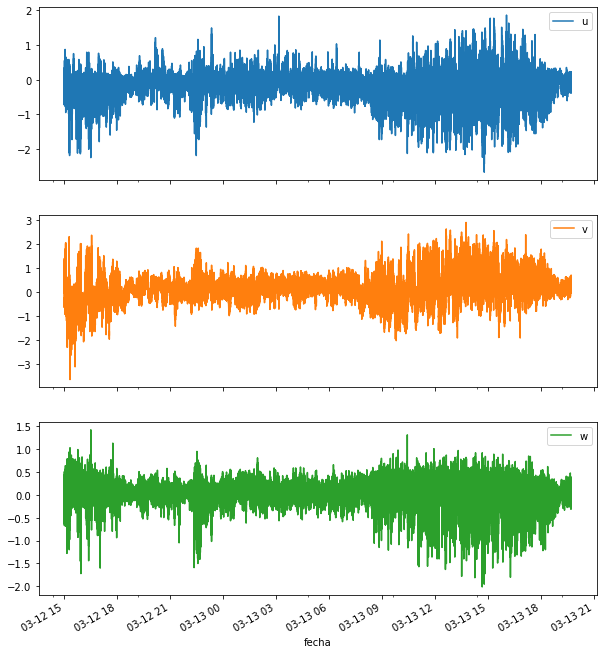

In [17]:
df.plot(subplots=True,figsize=(10,12))# Generamos gráficas por cada componente con un tamaño de figura

In [9]:
df.to_csv('../data/u_v_w.csv')#Escribimos el dataframe, que contiene los datos de todos los archivos, en un solo csv en la carpeta data